# 1. Importación de librerías y carga de datos

In [1]:
# from google.colab import drive
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
# Load dataset of positions
df = pd.read_csv("positions.csv")
df.head()

C:\Users\sandr\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,time(s),vehicle_id,victim_id,shape_collider,shape_victim,latitude(m),longitude(m),speed(m/s),heading,acceleration(m/s²),collision
0,1.0,0,-1,passenger,-1,41.402717,2.137950,14.7234,137.798227,0.0,0
1,1.0,200,-1,delivery,-1,41.401891,2.146248,0.0000,126.656286,0.0,0
2,1.0,201,-1,motorcycle,-1,41.396495,2.159059,0.0000,253.423078,0.0,0
3,1.0,202,-1,passenger,-1,41.393329,2.148322,0.0000,318.602899,0.0,0
4,1.0,203,-1,delivery,-1,41.391727,2.154971,0.0000,316.186762,0.0,0


In [3]:
df = df.sort_values(by=['vehicle_id', 'time(s)'])
df.head()

,time(s),vehicle_id,victim_id,shape_collider,shape_victim,latitude(m),longitude(m),speed(m/s),heading,acceleration(m/s²),collision
0,1.0,0,-1,passenger,-1,41.402717,2.137950,14.723400,137.798227,0.000000,0
31,2.0,0,-1,passenger,-1,41.402633,2.138082,14.418443,128.510085,-0.304957,0
64,3.0,0,-1,passenger,-1,41.402549,2.138213,14.193703,128.510085,-0.224740,0
100,4.0,0,-1,passenger,-1,41.402468,2.138340,13.853303,135.176752,-0.340400,0
158,5.0,0,-1,passenger,-1,41.402378,2.138462,14.350286,135.176752,0.496983,0


In [5]:
print(df.shape)

(215846924, 11)


In [6]:
df_veh = df[['vehicle_id','shape_collider']]
df_veh = df_veh.drop_duplicates()
print(df_veh.shape)
df_veh.to_csv('colliders_type.csv')

(107476, 2)


In [7]:
df_veh = df[['victim_id','shape_victim']]
df_veh = df_veh.drop_duplicates()
df_veh.to_csv('victims_type.csv')

In [8]:
# Dataset size
print("positions:", df.shape)
print("Observations: {}".format(df.shape[0]))
print("Variables: {}".format(df.shape[1]))
print("Vehicles: {}".format(len(df.vehicle_id.unique())))

positions: (215846924, 11)
Observations: 215846924
Variables: 11
Vehicles: 107476


In [9]:
# Load dataset with vehicles colision
#DATASET_COL = os.path.join(DATASETS_FOLDER, "collisions_1k.csv")
df_col = pd.read_csv('collisions_5k.csv')
df_col = df_col[['vehicle_id', 'victim_id']].astype(int)
df_col.head()

,vehicle_id,victim_id
0,863,300
1,8573,8361
2,8745,8517
3,6756,719
4,8104,9096


In [10]:
# Load dataset with vehicles no-colision
#DATASET_NOCOL = os.path.join(DATASETS_FOLDER, "no_collisions_1k.csv",delimiter=';')
df_nocol = pd.read_csv('no_collisions_5k.csv')
df_nocol = df_nocol[['v1', 'v2']]
df_nocol.head()

,v1,v2
0,31477,34003
1,33063,33228
2,33130,33973
3,33268,33958
4,33268,34256


In [11]:
# Load dataset with dimensions
#DATASET_DIM = os.path.join(DATASETS_FOLDER, "dimensions.csv")
df_dim = pd.read_csv('dimensions.csv')
df_dim = df_dim[['vehicle_id', 'length', 'width']]
df_dim.head()

,vehicle_id,length,width
0,0,5.0,1.8
1,2,5.0,1.8
2,3,5.0,1.8
3,4,2.2,0.9
4,5,5.0,1.8


# 2. Análisis exploratorio de los datos (EDA)

In [12]:
# Dataset size
print("positions:", df.shape)
print("Observations: {}".format(df.shape[0]))
print("Variables: {}".format(df.shape[1]))
print("Vehicles: {}".format(len(df.vehicle_id.unique())))
print("dimensions:", df_dim.shape)
print("collisions:", df_col.shape)
print("no_collisions:", df_nocol.shape)

positions: (215846924, 11)
Observations: 215846924
Variables: 11
Vehicles: 107476
dimensions: (115536, 3)
collisions: (914, 2)
no_collisions: (914, 2)


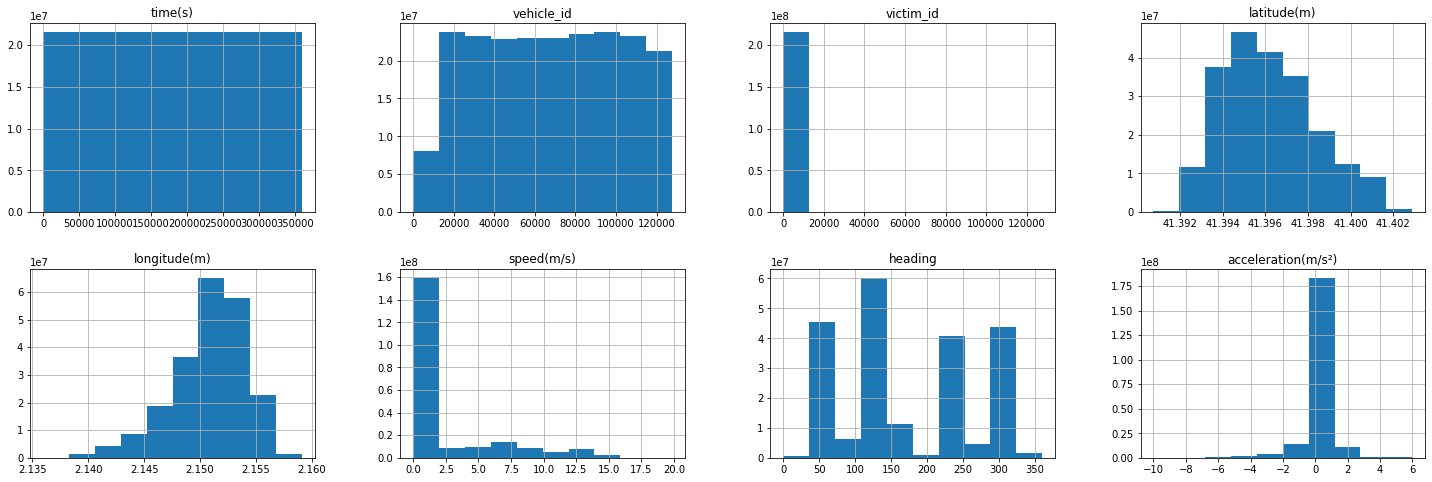

In [14]:
# Distributions of numerical attributes
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(25,8))
df.hist('time(s)', ax=ax[0][0])
df.hist('vehicle_id', ax=ax[0][1])
df.hist('victim_id', ax=ax[0][2])
df.hist('latitude(m)', ax=ax[0][3])
df.hist('longitude(m)', ax=ax[1][0])
df.hist('speed(m/s)', ax=ax[1][1])
df.hist('heading', ax=ax[1][2])
df.hist('acceleration(m/s²)', ax=ax[1][3])
plt.show()

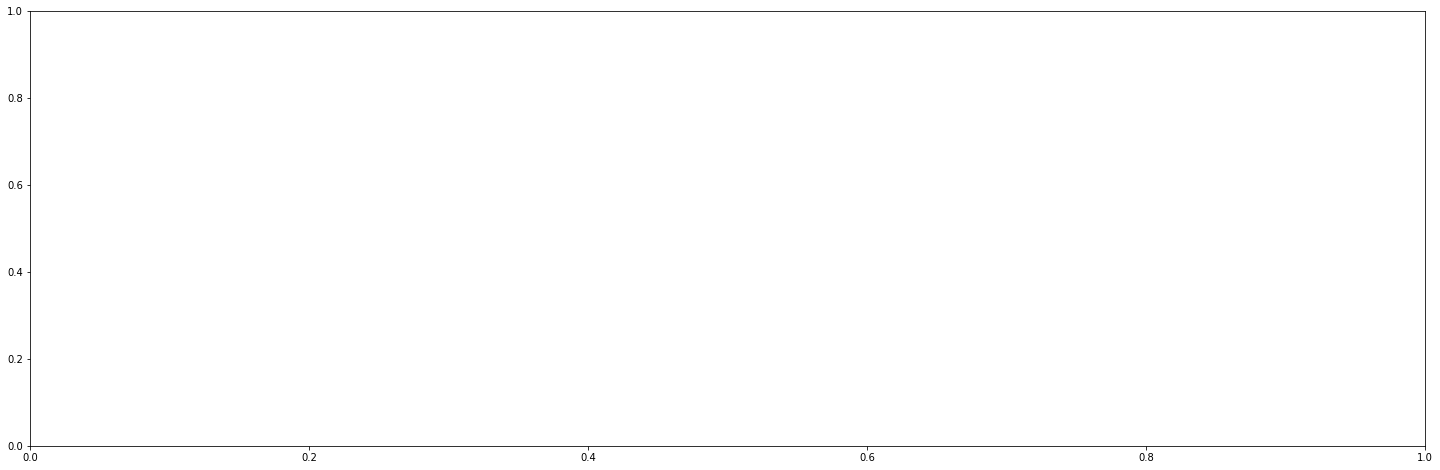

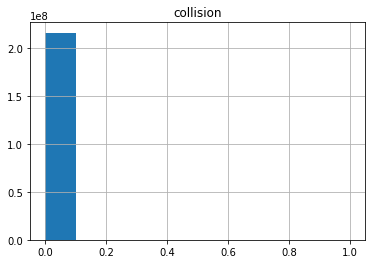

In [19]:
# Distributions of numerical attributes (individual)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25,8))
# df.hist('time(s)', ax=ax[0][0])
# df.hist('vehicle_id', ax=ax[0][1])
# df.hist('victim_id', ax=ax[0][2])
df.hist('collision')
# df.hist('longitude(m)', ax=ax[1][0])
# df.hist('speed(m/s)', ax=ax[1][1])
# df.hist('heading', ax=ax[1][2])
# df.hist('acceleration(m/s²)', ax=ax[1][3])
plt.show()

In [15]:
# Range of values
print("time(s): [{}, {}]".format(min(df['time(s)']), max(df['time(s)'])))
print("vehicle_id: [{}, {}]".format(min(df['vehicle_id']),
                                    max(df['vehicle_id'])))
print("victim_id: [{}, {}]".format(min(df['victim_id']), max(df['victim_id'])))
print("latitude(m): [{}, {}]".format(min(df['latitude(m)']),
                                     max(df['latitude(m)'])))
print("longitude(m): [{}, {}]".format(min(df['longitude(m)']),
                                      max(df['longitude(m)'])))
print("speed(m/s): [{}, {}]".format(min(df['speed(m/s)']),
                                    max(df['speed(m/s)'])))
print("heading: [{}, {}]".format(min(df['heading']), max(df['heading'])))
print("acceleration(m/s²): [{}, {}]".format(min(df['acceleration(m/s²)']),
      max(df['acceleration(m/s²)'])))

time(s): [1.0, 360000.0]
vehicle_id: [0, 127626]
victim_id: [-1, 127593]
latitude(m): [41.390741606618576, 41.40288846294933]
longitude(m): [2.135959568514987, 2.1591370488173847]
speed(m/s): [0.0, 19.8432928805958]
heading: [2.0522439263279136e-05, 359.9999016095033]
acceleration(m/s²): [-10.0, 5.999997826134736]


In [16]:
# Number of vehicles stopped or finishing braking
print(len(df[df['speed(m/s)'] == 0]))
print(len(df[df['acceleration(m/s²)'] == 0]))
print(len(df[(df['speed(m/s)'] == 0) & (df['acceleration(m/s²)'] <= 0)]))

129461790
126481622
129461790


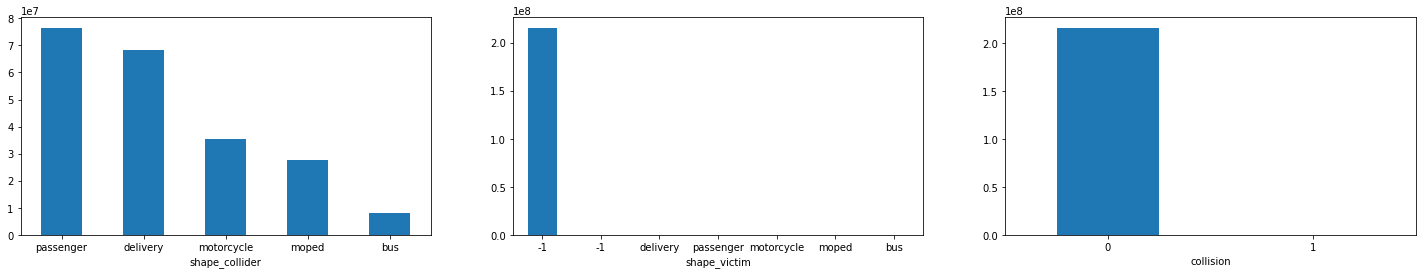

In [17]:
# Distributions of categorical attributes
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25,4))
df['shape_collider'].value_counts().plot(kind='bar', rot=0,
                                         xlabel='shape_collider', ax=ax[0])
df['shape_victim'].value_counts().plot(kind='bar', rot=0, xlabel='shape_victim',
                                       ax=ax[1])
df['collision'].value_counts().plot(kind='bar', rot=0, xlabel='collision',
                                    ax=ax[2])
plt.show()

In [18]:
# Categories counter
print("shape_collider\n--------------")
print(df['shape_collider'].value_counts())
print("\nshape_victim\n------------")
print(df['shape_victim'].value_counts())
print("\ncollision\n---------")
print(df['collision'].value_counts())

shape_collider
--------------
passenger     76486136
delivery      68143858
motorcycle    35238179
moped         27725665
bus            8253086
Name: shape_collider, dtype: int64

shape_victim
------------
-1            215476053
-1               327680
delivery          16562
passenger         15260
motorcycle         4281
moped              4005
bus                3083
Name: shape_victim, dtype: int64

collision
---------
0    215803733
1        43191
Name: collision, dtype: int64


In [19]:
df.describe()

,time(s),vehicle_id,victim_id,latitude(m),longitude(m),speed(m/s),heading,acceleration(m/s²),collision
count,2.158469e+08,2.158469e+08,2.158469e+08,2.158469e+08,2.158469e+08,2.158469e+08,2.158469e+08,2.158469e+08,2.158469e+08
mean,1.800255e+05,6.750152e+04,1.258005e+01,4.139620e+01,2.150885e+00,2.096001e+00,1.777020e+02,3.147619e-03,2.001001e-04
std,1.039084e+05,3.427852e+04,1.075292e+03,2.141778e-03,3.290768e-03,3.833068e+00,9.416371e+01,9.217062e-01,1.414426e-02
min,1.000000e+00,0.000000e+00,-1.000000e+00,4.139074e+01,2.135960e+00,0.000000e+00,2.052244e-05,-1.000000e+01,0.000000e+00
25%,9.003800e+04,3.758700e+04,-1.000000e+00,4.139456e+01,2.149098e+00,0.000000e+00,1.319444e+02,0.000000e+00,0.000000e+00
50%,1.800250e+05,6.737600e+04,-1.000000e+00,4.139587e+01,2.151333e+00,0.000000e+00,1.416192e+02,0.000000e+00,0.000000e+00
75%,2.700130e+05,9.703700e+04,-1.000000e+00,4.139753e+01,2.153252e+00,2.405017e+00,2.518762e+02,0.000000e+00,0.000000e+00
max,3.600000e+05,1.276260e+05,1.275930e+05,4.140289e+01,2.159137e+00,1.984329e+01,3.599999e+02,5.999998e+00,1.000000e+00


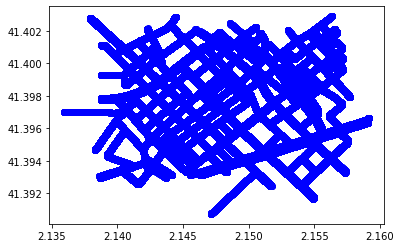

In [20]:
# Map of coordinates
fig, ax = plt.subplots(1, 1)
plt.plot(df['longitude(m)'], df['latitude(m)'], 'bo')
plt.show()

In [21]:
# Count time registered per vehicle
df_vehicle_time = (df[['time(s)', 'vehicle_id']].groupby(['vehicle_id']).count()
                   .rename(columns={'time(s)': 'seconds'}))
df_vehicle_time.head()

,seconds
vehicle_id,
0,9092
21,9568
24,1549
26,1098
28,4442


In [22]:
df_vehicle_time['seconds'].describe()

count    107476.000000
mean       2008.326733
std        2215.395114
min           3.000000
25%         341.000000
50%        1222.000000
75%        2949.000000
max       19850.000000
Name: seconds, dtype: float64